# Netfilix dataset

The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this project, I have analysed this dataset to find top insights and findings.

# import  libraries and read dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
from plotly.offline import plot

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


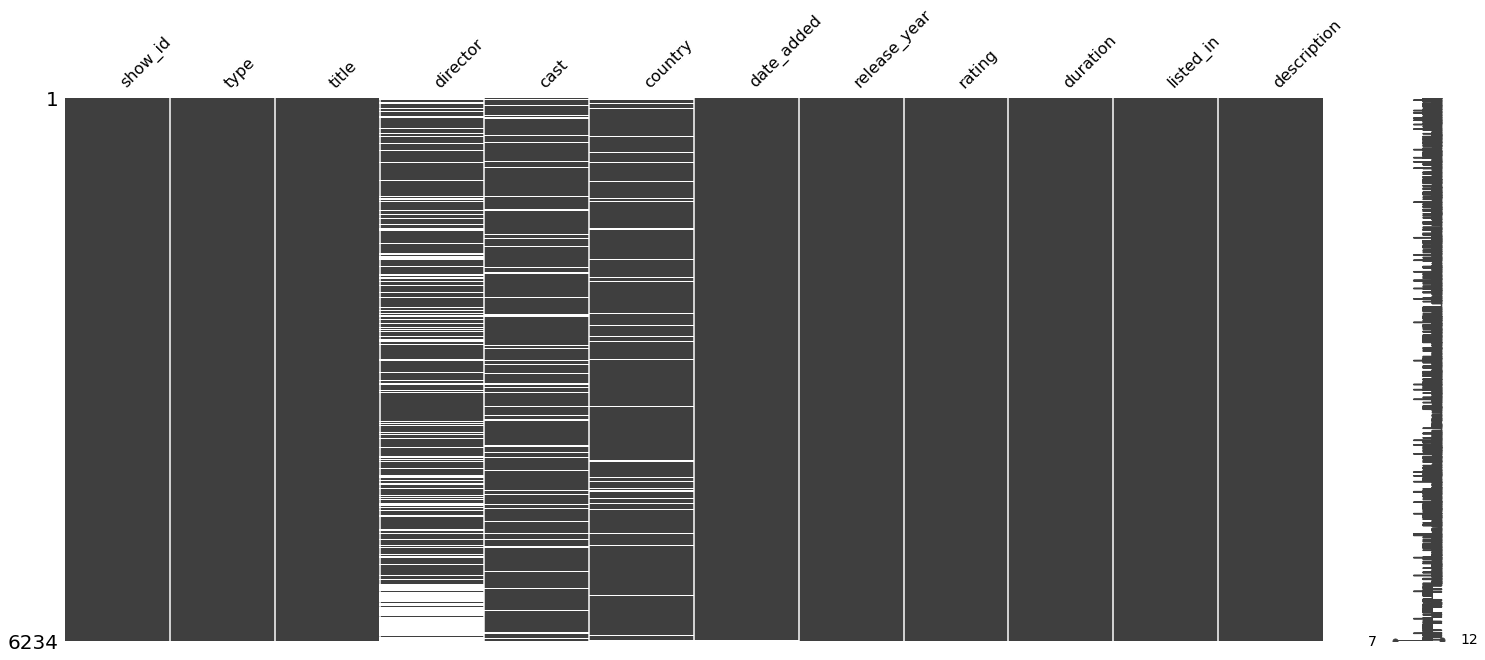

In [4]:
#visualization missing data
msno.matrix(df)
plt.show()

In [5]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate: {null_rate} %")

director's null rate: 31.584857234520374 %
cast's null rate: 9.143407122232915 %
country's null rate: 7.635547000320821 %
date_added's null rate: 0.17645171639396856 %
rating's null rate: 0.16041065126724416 %


In [6]:
c= df.isnull().sum()
c[c>0]

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

# Data Cleaning

Drop the 'show_id' column. 
Drop duplicated listings. 
Replace the 10 missing rows in 'rating' with mode. 
Replace the missing rows in 'date_added' with 'January 1, {release_year}. 
Convert the 'date_added' column from object type to datetime. 
Split the 'duration' column from object type to two seprated columns 'season' int type and 'duration_min' int type. 

In [7]:
def clean_data(data):
    #change name of columns just for easy typing
    data.columns = data.columns.str.lower().str.replace(' ','_')
    #drop duplicates
    data.drop_duplicates( keep = 'last', inplace=True)
    for i in data.columns:
        #Delete Columns That Contain just a Single Value because it isn't helffull in Analysis
        #determine number of unique value & percentage  in each columns
        num_value = len(data[i].unique())
        if num_value == 1:
            df.drop(i, axis=1, inplace=True)
        else:
            percent_unique =float(num_value)/data.shape[0]*100 
            print('unique value & percentage in : %s  = %s , %.2f'%(i,num_value,percent_unique))
            if percent_unique< 1:
                print(data[i].unique())
    print(data.shape)
clean_data(df)    

unique value & percentage in : show_id  = 6234 , 100.00
unique value & percentage in : type  = 2 , 0.03
['Movie' 'TV Show']
unique value & percentage in : title  = 6172 , 99.01
unique value & percentage in : director  = 3302 , 52.97
unique value & percentage in : cast  = 5470 , 87.74
unique value & percentage in : country  = 555 , 8.90
unique value & percentage in : date_added  = 1525 , 24.46
unique value & percentage in : release_year  = 72 , 1.15
unique value & percentage in : rating  = 15 , 0.24
['TV-PG' 'TV-MA' 'TV-Y7-FV' 'TV-Y7' 'TV-14' 'R' 'TV-Y' 'NR' 'PG-13' 'TV-G'
 'PG' 'G' nan 'UR' 'NC-17']
unique value & percentage in : duration  = 201 , 3.22
unique value & percentage in : listed_in  = 461 , 7.39
unique value & percentage in : description  = 6226 , 99.87
(6234, 12)


In [8]:
#Fill missing data in 'rating' column,'UR' that means unrated,'NR' that means not rated
df['rating'] = df['rating'].fillna('UR')
df['rating'].isnull().sum()

0

In [9]:
#Fill missing data in 'date_added' column
df['date_added'] = df['date_added'].fillna('January 1, 2020')
df['date_added'].isnull().sum()

0

In [10]:
#add new feature and change Dtype
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [11]:
df.duration

0           90 min
1           94 min
2         1 Season
3         1 Season
4           99 min
           ...    
6229    13 Seasons
6230     4 Seasons
6231        60 min
6232     2 Seasons
6233    10 Seasons
Name: duration, Length: 6234, dtype: object

In [12]:
#Split 'duration' column, add new feature and change Dtype
df['tv_season'] = df['duration'].apply(lambda x : x.split(' ')[0] if 'Season' in x else None)
df['movie_duration_min'] = df['duration'].apply(lambda x: x.split(' ')[0] if 'Season' not in x else None )
df['tv_season'] = df['tv_season'].fillna(0)
df['movie_duration_min'] = df['movie_duration_min'].fillna(0)
df.head(2)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                                    country date_added  release_year rating  \
0  United States, India, South Korea, China 2019-09-09          2019  TV-PG   
1                            United Kingdom 2016-09-09          2016  TV-MA   

  duration                           listed_in  \
0   90 min  Children & Family Movies, Comedies   
1   94 min                     Stand-Up Comedy   

                                         description  year_added  month_added  \
0  Before planning an awesome wedding for his gra...        2019            9   
1  Jandino Asporaat riffs on the challenges of ra...        2016            9   

  tv_season movie_duration_min  
0         0                 90  
1         0                 94

In [13]:
df.director = df.director.fillna('unknown')
df.cast = df.cast.fillna('unknown')
df.country = df.country.fillna('unknown')

In [14]:
df.isnull().sum()

show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
year_added            0
month_added           0
tv_season             0
movie_duration_min    0
dtype: int64

In [15]:
df.drop(['date_added','duration'],axis = 1,inplace = True)

# Content type on Netilix

In [16]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

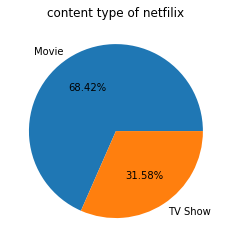

In [17]:
#pie chart 1
pi2 = df.type.value_counts()
plt.title('content type of netfilix')
plt.pie(pi2.values ,labels=pi2.index,autopct='%1.2f%%' )
plt.show()

In [18]:
#pie chart 2 with plotly.graph_objects as go
trace = go.Pie(values =pi2.values ,labels=pi2.index , marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title='content type of netfilix', height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

This graph shows us more than 2/3 of all content belongs to movies and almost 1/3 belongs to Tv shows

# Making new dataset

For analysis, make movie data & TV Show data

In [19]:
movie = df[df['type']=='Movie']
tv  = df[df['type']=='TV Show']

# Growth in content over the years

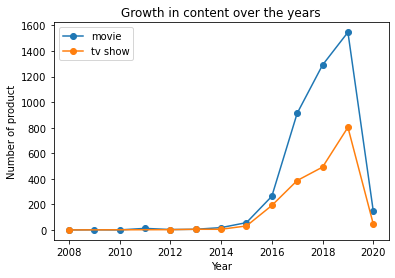

In [20]:
#plot with plt

dmo = movie['year_added'].value_counts().sort_index()
dtv = tv['year_added'].value_counts().sort_index()

plt.plot(dmo.index ,dmo.values ,marker='o',label = 'movie')
plt.plot(dtv.index ,dtv.values ,marker='o',label = 'tv show')
plt.title('Growth in content over the years')
plt.xlabel('Year')
plt.ylabel('Number of product')
plt.legend()
plt.show()


A quick look at the data reveals that as time goes on, the number  of products increases,but in 2020 has decreased. I think it is becuase of data colected till earlier of 2020. let's see is it True or not

In [21]:
df[df['year_added'] == 2020]['month_added'].value_counts()

1    195
Name: month_added, dtype: int64

It's shows data colected untill Jan,so we can deleted year 2020 for now

In [22]:
#Scatter plot with plotly.graph_objects as go

df2 = df[df['year_added']!=2020]
dmo = df2[df2['type']=='Movie']['year_added'].value_counts().sort_index()
dtv = df2[df2['type']=='TV Show']['year_added'].value_counts().sort_index()
dtot = df2['year_added'].value_counts().sort_index()

trace1 = go.Scatter(x=dtv.index, y=dtv.values, name="TV Shows")
trace2 = go.Scatter(x=dmo.index, y=dmo.values, name="Movies")
trace3 = go.Scatter(x= dtot.index, y=dtot.values, name = 'Total')
data = [trace1, trace2, trace3]
layout = go.Layout(title="Products Added per Year",xaxis_title = 'Year Added to Netflix',yaxis_title = 'Number of Products', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [23]:
trace1 = go.Bar(x=dtv.index, y=dtv.values, name="TV Shows")
trace2 = go.Bar(x=dmo.index, y=dmo.values, name="Movies")
trace3 = go.Bar(x= dtot.index, y=dtot.values, name = 'Total')
data = [trace1, trace2, trace3]
layout = go.Layout(title="Products Added per Year",xaxis_title = 'Year Added to Netflix',yaxis_title = 'Number of Products' ,legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
xlabel = 'Year Added to Netflix'
fig.show()

# Content from Countries

In [24]:
countries = ', '.join(df['country'].dropna()).split(', ')
countries = pd.Series(countries)
top5 =  countries.value_counts()[:5].sum()
top10 = countries.value_counts()[:10].sum()
top20 = countries.value_counts()[:20].sum()
tot = countries.value_counts().sum()

print(f'total : {tot}')
print(f'percentage5 :   {100 * top5/tot}')
print(f'percentage10 :  {100 * top10/tot}')
print(f'percentage20 :  {100 * top20/tot}')

total : 7655
percentage5 :   63.2527759634226
percentage10 :  76.22468974526453
percentage20 :  87.99477465708686


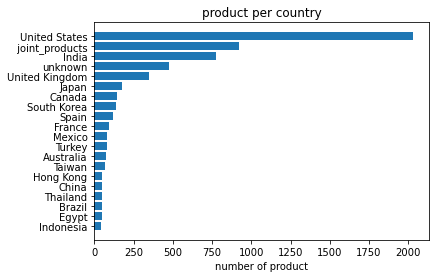

In [25]:
#first approach
df3 = df.copy()
df3.dropna(subset = ['country'], inplace=True)
df3['country'] = df3.country.apply(lambda x : ' joint_products' if ',' in x else x)

co = df3.country.value_counts()

plt.barh(co.index[:20][::-1], co.values[:20][::-1])
plt.xlabel('number of product')
plt.title('product per country')
plt.show()
        

In [26]:
#top 10
#second method(without joint_products)
countries = ", ".join(df['country'].dropna()).split(", ")
countries = pd.Series(countries)
co = countries.value_counts()
trace1 = go.Bar(y=co.index[:10][::-1], x=co.values[:10][::-1], orientation="h", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="top 10 Countries with most content (total)", height=700)
fig = go.Figure(data, layout=layout)
fig.show()    

In [27]:
#Bar chart1: top10 country divided by type
top10 = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico']
country_movie = ', '.join(movie['country'].dropna()).split(', ')
country_movie = pd.Series(country_movie)
com =country_movie.value_counts()[top10]

country_tv = ', '.join(tv['country'].dropna()).split(', ')
country_tv = pd.Series(country_tv)
cot = country_tv.value_counts()[top10]


trace1 = go.Bar(x=com.index ,y = com.values ,name = 'Movie' )
trace2 = go.Bar(x=cot.index ,y = cot.values ,name = 'TV Show')
data=[trace1 ,trace2]
layout = go.Layout(title='Products of top 10 countries')
fig = go.Figure(data,layout = layout)
fig.show()

In [28]:
#Bar chart2: top10 country divided by type
dtv = df3[df3["type"] == "TV Show"]
dmo = df3[df3["type"] == "Movie"]
col = 'country'
cotv = dtv[col].value_counts()[:10]
cotv.sort_values()
como = dmo[col].value_counts()[:10]
como.sort_values()
fig = go.Figure()
fig.add_trace(go.Bar(x=cotv.index,
                y=cotv.values,
                name='TV Show',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=como.index,
                y=como.values,
                name='Movie',
                marker_color='violet'
                ))

fig.update_layout(title_text='Netflix top 10 country by making Movie, TV Show',xaxis_title="country",yaxis_title="Number of product",
                  barmode='stack') # by default it is group, else barmode='group'
fig.show()

# animation : Comparison by country per year

In [29]:
#Comparison by country per year
import plotly.express as px
year_country2 = df.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country per year')
fig.show()

# Rating Distribution

Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Maturity ratings are either determined by Netflix or by a local standards organization. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.
*TV Ratings
TV-Y: All Children
Intended for children ages 2 to 6 and is not designed or expected to frighten.
TV-Y7: Directed to Older Children
Intended for children ages 7 and older. Best suited for children who know the difference between real life and make-believe. Contains mild fantasy or comedic violence. Some content could frighten younger children (under age 7).
TV-Y7 FV: Directed to Older Children - Fantasy Violence
Intended for older children. Contains fantasy violence more combative than TVY7 programs.
TV-G: General Audience
Intended for all ages. Contains little or no violence, no strong language and little or no sexual dialogue or situations.
TV-PG: Parental Guidance Suggested
Intended for younger children in the company of an adult. Possibly contains some suggestive dialogue, infrequent coarse language, some sexual situations or some moderate violence.
TV-14: Parents Strongly Cautioned
Intended for children ages 14 and older in the company of an adult. Possibly contains intensely suggestive dialogue, strong coarse language, intense sexual situations or intense violence.
TV-MA: Mature Audience Only
Intended for adults and may be unsuitable for children under 17. Possibly contains crude indecent language, explicit sexual activity or graphic violence.

*Movie (Film) Ratings
G: General Audiences
This program is designed to be appropriate for all ages. This rating indicates a film contains nothing that would offend parents for viewing by children.
PG: Parental Guidance Suggested
Parents are urged to give parental guidance. This film may contain some material parents might not like for their young children.
PG-13: Parents Strongly Cautioned
Some material may not be suited for children under age 13. May contain violence, nudity, sensuality, language, adult activities or other elements beyond a PG rating, but doesn’t reach the restricted R category.
R: Restricted
This rating is for films specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
NC-17: Clearly Adult
This rating is applied to films the MPAA believes most parents will consider inappropriate for children 17 and under. It indicates only that adult content is more intense than in an R rated movie.

**
General     : G
Little Kids : TV-Y, TV-G
Older Kids  : PG, TV-Y7, TV-Y7-FV, TV-PG
Teens	    : PG-13, TV-14
Mature      : R, NC-17, TV-MA
		

In [30]:
# 'UR' (Unrated) rating is equivalent to 'NR' (Not Rated)
df['rating'] = df['rating'].replace(to_replace = 'UR', value = 'NR')

In [31]:
tv_rating = tv['rating'].value_counts()
tv_rating

TV-MA       679
TV-14       660
TV-PG       269
TV-Y        102
TV-Y7       100
TV-G         69
TV-Y7-FV     68
NR           16
R             2
UR            2
G             1
PG            1
Name: rating, dtype: int64

In [32]:
mo_rating = movie['rating'].value_counts()
mo_rating

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR            15
NC-17          2
Name: rating, dtype: int64

In [33]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
tv_rating = tv['rating'].value_counts()
mo_rating = movie['rating'].value_counts()
tv_dic ={}
mo_dic ={}
for i in rating_order:
    if i not in tv_rating:
        tv_dic[i]=0
    else:
        tv_dic[i]=tv_rating[i]
        
for i in rating_order:
    if i not in mo_rating:
        mo_dic[i]=0
    else:
        mo_dic[i]=mo_rating[i]    

tv_rat = pd.Series(tv_dic)  
mo_rat = pd.Series(mo_dic)
trace1 = go.Bar(x=tv_rat.index, y=tv_rat.values ,name = 'TV Show')
trace2 = go.Bar(x=mo_rat.index, y=mo_rat.values ,name = 'Movie')
data = [trace1,trace2]
layout = go.Layout(title='Netfilix Product per Rating Kids to Adult')
fig = go.Figure(data, layout)
fig.show()



# Products according to Cataories

In [34]:
categories = ', '.join(df['listed_in']).split(', ')
cat = pd.Series(categories)
cat = cat.value_counts()
trace = go.Bar(y= cat.index[::-1], x =cat.values[::-1], name = 'categories', orientation = 'h')
data = [trace]
layout = go.Layout(title='number of different categories in Netfilix')
fig = go.Figure(data,layout=layout)
fig.show()

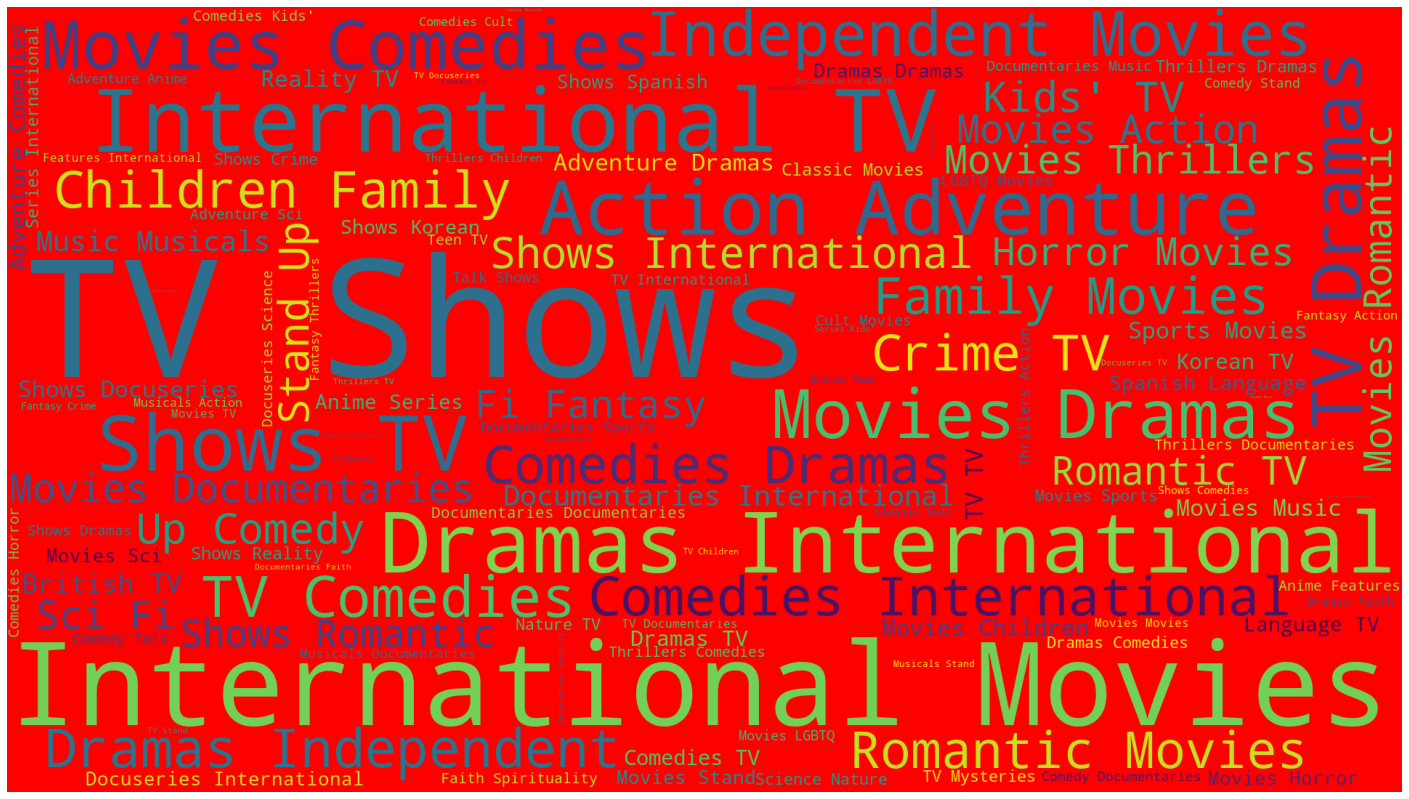

In [35]:
#wordcloud categories
from wordcloud import WordCloud 
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='red',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

#  Directors in Netfilix

In [36]:
#cateories = ', '.join(df['director'].split(', ')
categories = ', '.join(df['director']).split(', ')
cat = pd.Series(categories).value_counts()
cat[:10]

unknown             1969
Jan Suter             21
Raúl Campos           19
Marcus Raboy          14
Jay Karas             14
Jay Chapman           12
Steven Spielberg       9
Martin Scorsese        9
David Dhawan           8
Johnnie To             8
dtype: int64

In [37]:
#Top 20 director total
categories = ', '.join(df['director']).split(', ')
cat = pd.Series(categories).value_counts()[1:11]

trace = go.Bar(y= cat.index[::-1], x =cat.values[::-1], orientation = 'h')
data = [trace]
layout = go.Layout(title='director with most product in Netfilix')
fig = go.Figure(data,layout=layout)
fig.show()

In [38]:
#top10_directors in top10 countries 
def top10_directors(country):
    ct = df[(df.country == str(country)) & (df.director!='unknown')]
    directors = ', '.join(ct['director']).split(', ')
    directors = pd.Series(directors)
    directors = directors.value_counts()[:10]
    
    trace = go.Bar(x=directors.values[:10][::-1] , y = directors.index[:10][::-1] ,name =country , orientation='h' )
    return trace

from plotly.subplots import make_subplots

traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", 'South Korea']
for title in titles:
    if title != "":
        traces.append(top10_directors(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(title_text = 'top 10 directors in different country in Movie sector',height=1000, showlegend=False)
fig.show()

In [39]:
# Last 5 Movie/TV Show From Top10 Director
sector = movie[df.director!='unknown']
dic_directore = sector['director']
dic_directore = dic_directore.value_counts()[:10]
        
for i in dic_directore.index:
    top10_directore = sector[sector['director']==i][['title','release_year']].sort_values(['release_year'],ascending = False)[:5]
    fig = go.Figure(data=[go.Table(header=dict(values=['director','title','year']),
                 cells=dict(values=[[i], top10_directore['title'],top10_directore['release_year']]))
                     ])
    fig.show()
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Best actors/actresses in country

In [40]:
#This function take type and country ,give you top 10 actors/actresses at given country
def top10_directors(country):
    ct = df[(df.country == str(country)) & (df.cast != 'unknown')]
    actors = ', '.join(ct['cast']).split(', ')
    actors = pd.Series(actors)
    actors = actors.value_counts()[:10]
    
    trace = go.Bar(x=actors.values[:10][::-1] , y = actors.index[:10][::-1] ,name =country , orientation='h' )
    return trace


traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", 'South Korea']
for title in titles:
    if title != "":
        traces.append(top10_directors(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(title_text = 'top 10 actors/actresses in different country ',height=1000, showlegend=False)
fig.show()

# Most Popular Words in Title

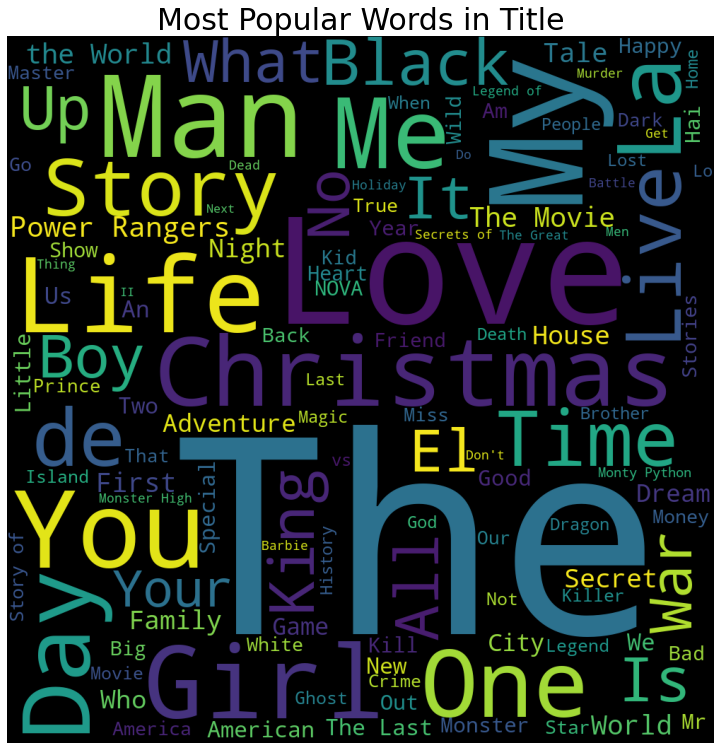

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()


# Content-Based Movie Recommender System

I want my recommender to be based only on the title, director, cast, genre and description , so these are the only columns I considered in the modeling.

In [42]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'listed_in', 'description', 'year_added',
       'month_added', 'tv_season', 'movie_duration_min'],
      dtype='object')

In [44]:
#Create New DataFrame
new_df = df.copy()
new_df = new_df[['title', 'director', 'cast', 'listed_in', 'description']]
new_df.head(2)

title                  director  \
0  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1               Jandino: Whatever it Takes                   unknown   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...

In [45]:
# Creating the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())
    

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)
new_df.head(2)

title                  director  \
0  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1               Jandino: Whatever it Takes                   unknown   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   

                                           Key_words  
0  [grandfather, awesome, wedding, evil, archaeol...  
1  [challenges, serenades, comedy, show, jandino,...

In [46]:
# discarding the commas between the actors' full names 
new_df['cast'] = new_df['cast'].map(lambda x: x.split(','))

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

In [47]:
new_df.set_index('title', inplace = True)
new_df.head()

director  \
title                                                            
Norm of the North: King Sized Adventure  richardfinn,timmaltby   
Jandino: Whatever it Takes                             unknown   
Transformers Prime                                     unknown   
Transformers: Robots in Disguise                       unknown   
#realityhigh                                   fernandolebrija   

                                                                                      cast  \
title                                                                                        
Norm of the North: King Sized Adventure  [alanmarriott, andrewtoth, briandobson, coleho...   
Jandino: Whatever it Takes                                               [jandinoasporaat]   
Transformers Prime                       [petercullen, sumaleemontano, frankwelker, jef...   
Transformers: Robots in Disguise         [willfriedle, darrencriss, constancezimmer, kh...   
#realityhigh                             [nestacooper, katewalsh, johnmichaelhiggins, k...   

                                                                     listed_in  \
title                                                                            
Norm of the North: King Sized Adventure  [children & family movies,  comedies]   
Jandino: Whatever it Takes                                   [stand-up comedy]   
Transformers Prime                                                  [kids' tv]   
Transformers: Robots in Disguise                                    [kids' tv]   
#realityhigh                                                        [comedies]   

                                                                                 Key_words  
title                                                                                       
Norm of the North: King Sized Adventure  [grandfather, awesome, wedding, evil, archaeol...  
Jandino: Whatever it Takes               [challenges, serenades, comedy, show, jandino,...  
Transformers Prime                       [three, human, allies, autobots, protect, eart...  
Transformers: Robots in Disguise         [protect, humankind, prison, ship, crash, unle...  
#realityhigh                             [lands, social, media, celebrity, interest, ne...

In [48]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

In [49]:
new_df.head()

bag_of_words
title                                                                                     
Norm of the North: King Sized Adventure  richardfinn,timmaltby alanmarriott andrewtoth ...
Jandino: Whatever it Takes               unknown jandinoasporaat stand-up comedy challe...
Transformers Prime                       unknown petercullen sumaleemontano frankwelker...
Transformers: Robots in Disguise         unknown willfriedle darrencriss constancezimme...
#realityhigh                             fernandolebrija nestacooper katewalsh johnmich...

# Feature Extraction and Modeling

In [50]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

In [51]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.08240856, 0.02993422,
        0.03279129],
       [0.        , 1.        , 0.0855921 , ..., 0.10012523, 0.03636965,
        0.03984095],
       [0.        , 0.0855921 , 1.        , ..., 0.08998425, 0.13074409,
        0.10741723],
       ...,
       [0.08240856, 0.10012523, 0.08998425, ..., 1.        , 0.07647191,
        0.08377078],
       [0.02993422, 0.03636965, 0.13074409, ..., 0.07647191, 1.        ,
        0.24343225],
       [0.03279129, 0.03984095, 0.10741723, ..., 0.08377078, 0.24343225,
        1.        ]])

In [52]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [53]:
recommendations('Rocky')

['Rocky III',
 'Rocky II',
 'Rocky IV',
 'Rocky V',
 'Abdo Mota',
 'Tango Feroz',
 'Mountain',
 'LEGO Ninjago: Masters of Spinjitzu: Day of the Departed',
 'The Bund',
 "Logan's Run"]

In [54]:
recommendations('War Horse')

['Planetarium',
 'The Theory of Everything',
 'The Exception',
 'God Bless the Broken Road',
 "Schindler's List",
 'Abdo Mota',
 'Mowgli: Legend of the Jungle',
 'Harry and Snowman',
 "The Butterfly's Dream",
 'The Good Catholic']

In [55]:
recommendations('Good People')

['Blood Money',
 'Romeo Ranjha',
 'Limitless',
 'Spider-Man 3',
 'Used Goods',
 'Iron Sky: The Coming Race',
 'Sardaarji 2',
 'The Darkest Dawn',
 'Pulang',
 'Ninja Assassin']